<a href="https://colab.research.google.com/github/FajarKKP/ML-DL_related_project/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras

In [2]:
eff_model1 = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False, input_shape=(224,224,3))
print(type(eff_model1))
eff_model1.summary()

<class 'keras.engine.functional.Functional'>
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 2

In [3]:
from tensorflow.keras import models
from tensorflow.keras import layers

eff_model1.trainable = False

dropout_rate = 0.4
model = models.Sequential()
model.add(eff_model1)
model.add(layers.GlobalMaxPooling2D(name="gap"))
# model.add(layers.Flatten(name="flatten"))
if dropout_rate > 0:
    model.add(layers.Dropout(dropout_rate, name="dropout_out"))

model.add(layers.Dense(24, activation="softmax", name="fc_out"))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 gap (GlobalMaxPooling2D)    (None, 1280)              0         
                                                                 
 dropout_out (Dropout)       (None, 1280)              0         
                                                                 
 fc_out (Dense)              (None, 24)                30744     
                                                                 
Total params: 4,080,315
Trainable params: 30,744
Non-trainable params: 4,049,571
_________________________________________________________________


In [5]:
# Preprocesss data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/drive/MyDrive/Skripsi/Dataset_Skripsi_Lengkap'


batch_size = 32
image_size = (224,224)

In [6]:
# train_datagen = ImageDataGenerator(
#     rescale = 1/255,
#     rotation_range = 40,
#     width_shift_range =0.2,
#     height_shift_range =0.2,
#     shear_range=0.2,
#     zoom_range = 0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
# test_datagen = ImageDataGenerator(rescale=1/255)

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.1,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 12118 files belonging to 24 classes.
Using 9695 files for training.
Found 12118 files belonging to 24 classes.
Using 1211 files for validation.
Found 12118 files belonging to 24 classes.
Using 1211 files for validation.


In [8]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

In [9]:
augmented_train_ds = train_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

augmented_val_ds = val_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

augmented_test_ds = test_ds.map(
  lambda x, y: (data_augmentation(x, training=True), y))

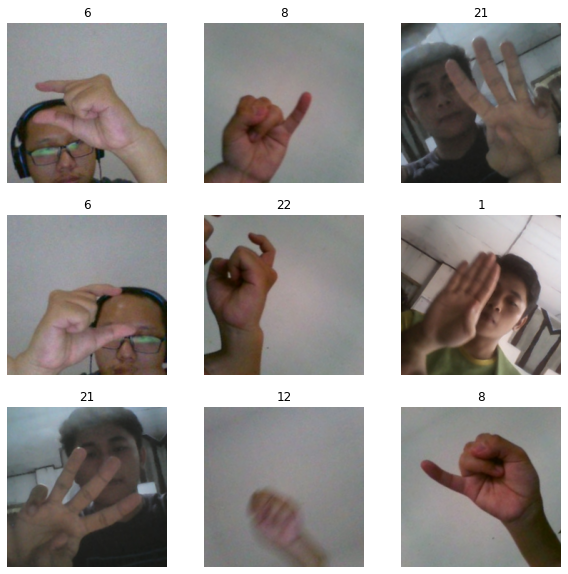

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in augmented_val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
# Train model
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds,
)

Epoch 1/20
177/303 [================>.............] - ETA: 3:11 - loss: 4.4963 - accuracy: 0.3316

In [ ]:
# train_generator = train_datagen.flow_from_directory(
#     train_ds,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )


# validation_generator = test_datagen.flow_from_directory(
#     validation_ds,
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode='categorical'
# )